## Deep Learning model to identify defects in semiconductor Wafer

Data source is from kaggle linnk https://www.kaggle.com/datasets/qingyi/wm811k-wafer-map?resource=download

In [98]:
import numpy as np
import pandas as pd
import cv2
import os
import pickle

In [99]:
for file in os.listdir(r"C:\Users\anees\Downloads\LSWMD"):
    path= r"C:\Users\anees\Downloads\LSWMD\\"
    data=pd.read_pickle(path+file)

In [100]:
data.describe()

,dieSize,waferIndex
count,811457.000000,811457.000000
mean,1840.998585,12.961207
std,2254.987374,7.207489
min,3.000000,1.000000
25%,710.000000,7.000000
50%,953.000000,13.000000
75%,1902.000000,19.000000
max,48099.000000,25.000000


In [101]:
data.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [102]:
print(len(data[data['failureType']=='none']), len(data[data['failureType']!='none']))

C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


147431 664026


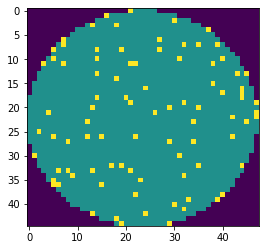

In [103]:
import matplotlib.pyplot as plt
plt.imshow(data['waferMap'].loc[0])

### Create dataset for good and defective sets

In [104]:
good_sample=data['waferMap'][data['failureType']=='none']

In [105]:
types=['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch']

bad_sample=data['waferMap'][data['failureType']=='Edge-Ring']

bad_samples=pd.DataFrame()
for i in types:
    a=data[data['failureType']==i]
    bad_samples=pd.concat([bad_samples,pd.DataFrame(a)])

C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.rave

In [106]:
good_sample=good_sample.reset_index(drop=True)
bad_sample=bad_sample.reset_index(drop=True)

In [107]:
print(bad_sample.shape,good_sample.shape)

(9680,) (147431,)


### The dataset contains various sizes. Standardize all the imgaes as same dimentions

(64, 64) (53, 58)


<function matplotlib.pyplot.show(close=None, block=None)>

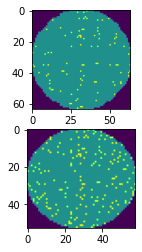

In [108]:
img=good_sample[100]

img1=cv2.resize(img,(64,64))
print(img1.shape,img.shape)

fig,ax=plt.subplots(2)

ax[0].imshow(img1)
ax[1].imshow(img)
plt.show

In [109]:
for i in range(len(good_sample)):
    good_sample[i]=cv2.resize(good_sample[i],(64,64))

In [110]:
for j in range(len(bad_sample)):
    bad_sample[j]=cv2.resize(bad_sample[j],(64,64))

In [111]:
# Create dataset contaning 9000 non-defective and 9000 defective chip data
x_train=[]
for i in range(9000):
    x_train.append(good_sample[i])
    
for i in range(9000):
    x_train.append(bad_sample[i])

In [112]:
x_train=np.array(x_train)
x_train=x_train.reshape(18000,64,64,1)
x_train.shape

(18000, 64, 64, 1)

In [113]:
y_train=np.concatenate([np.zeros(9000),np.ones(9000)])
len(y_train)

18000

### Build CNN model with 2 Convolutional layers and one output layer.

In [114]:
import tensorflow as tf
from tensorflow import keras

In [115]:
model=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1, 1),input_shape=(64,64,1),padding="valid", activation='relu'),
    keras.layers.MaxPooling2D(), 
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),  
    keras.layers.Dropout(0.3),
    #keras. layers.Conv2D(filters=128,kernel_size=3, activation='relu'),
    #keras.layers.MaxPooling2D(),
    #keras.layers.Dropout(0.2),
    #keras.layers.Conv2D(filters=256,kernel_size=3, activation='relu'),
    #keras.layers.MaxPooling2D(),  
    #keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(1,activation='sigmoid')
    
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [116]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
563/563 [==============================] - 52s 89ms/step - loss: 0.1104 - accuracy: 0.9586
Epoch 2/5
563/563 [==============================] - 51s 90ms/step - loss: 0.0330 - accuracy: 0.9888
Epoch 3/5
563/563 [==============================] - 51s 90ms/step - loss: 0.0216 - accuracy: 0.9926
Epoch 4/5
563/563 [==============================] - 50s 90ms/step - loss: 0.0138 - accuracy: 0.9950
Epoch 5/5
563/563 [==============================] - 52s 92ms/step - loss: 0.0113 - accuracy: 0.9964


In [117]:
#Test for some random value
a=bad_sample[6000].reshape(-1,64,64,1)
a.shape


(1, 64, 64, 1)

In [118]:
model.predict(a)
#Prediction should be 1 for babd sample and 0 for good sample

1/1 [==============================] - 0s 174ms/step


array([[0.9998627]], dtype=float32)

### Create test set and check accuracy of the model

In [119]:
test_data=[]
for i in range(1000):
    test_data.append(good_sample[15000+i])
for i in range(1000):
    test_data.append(bad_sample[8500+i])
test_data=np.array(test_data)
test_data=test_data.reshape(2000,64,64,1)

y_test=np.concatenate([np.zeros(1000),np.ones(1000)])

In [120]:
for i in range(len(predicted)):
    if predicted[i]<0.3:
        predicted[i]=0
    else:
        predicted[i]=1

In [121]:
from sklearn.metrics import classification_report

print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1047
         1.0       0.95      1.00      0.98       953

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



The model gave accuracy of 98% to detect any defects in chips. 

## Try to classify few defects types that are available in dataset

In [122]:
types=data['failureType'].reset_index(drop=True)
classes=[]
for i in range(len(types)):
    classes.append(str(types[i].squeeze()))
classes=set(classes)
classes


{'Center',
 'Donut',
 'Edge-Loc',
 'Edge-Ring',
 'Loc',
 'Near-full',
 'Random',
 'Scratch',
 '[]',
 'none'}

In [123]:
types=['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch']
counts=[]
for i in types:
    counts.append(len(data[data['failureType']==i]))


C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


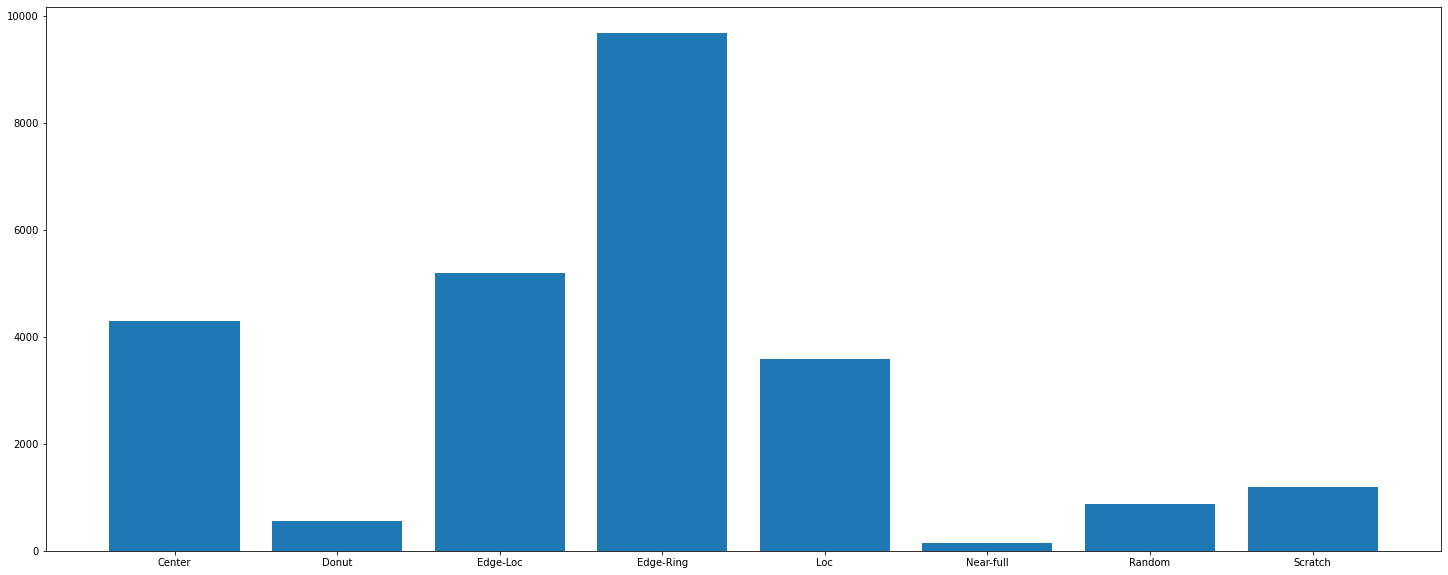

In [124]:
# Available defects trend in the dataset
plt.rcParams['figure.figsize'] = [25,10]
plt.bar(types,counts)
plt.show()

### Creating traing and test data for defect types Cente, Edge-Loc, Edge-Ring, Loc 

In [125]:
# training data
types1=['Center', 'Edge-Loc', 'Edge-Ring', 'Loc']
x_train1=pd.DataFrame()
for i in types1:
    #for j in range(500):
    #print(i)
    a=data[data['failureType']==i].iloc[:3500]
    #a=a['waferMap']
    #print(type(a))
    x_train1=pd.concat([x_train1,pd.DataFrame(a)])

# Select only waferMap
x_train1=x_train1['waferMap']
x_train1=np.array(x_train1)   
#validating data of all classes
print(x_train1.shape)


C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.rave

(14000,)


In [126]:
# Resize all images into same sizes
for i in range(len(x_train1)):
    x_train1[i]=cv2.resize(x_train1[i],(64,64))

In [127]:
x_train1[0].shape

(64, 64)

In [128]:
# Exctract all data in a numpy array
x_train2=[]
for i in range(len(x_train1)):
    x_train2.append(x_train1[i])

In [129]:
x_train2=np.array(x_train2)
x_train2=x_train2.reshape(-1,64,64,1)
x_train2.shape

(14000, 64, 64, 1)

In [130]:
# Create output classes for training
y_train1=[]

for i in range(len(types1)):
    for j in range(3500):
        y_train1.append(i)
y_train1=np.array(y_train1)
np.unique(y_train1)

array([0, 1, 2, 3])

In [131]:
# testing data
types1=['Center', 'Edge-Loc', 'Edge-Ring', 'Loc']
test_data1=pd.DataFrame()
y_testd1=[]
c=0
for i in types1:
    a=data[data['failureType']==i].tail(500)
    test_data1=pd.concat([test_data1,pd.DataFrame(a)])
    
    print(i,a.shape)
    for j in range(500):
        y_testd1.append(c)
    c+=1
    
test_data1=test_data1['waferMap']

test_data1=test_data1.reset_index(drop=True)

test_data2=[]
for i in range(len(test_data1)):
    test_data1[i]=cv2.resize(test_data1[i],(64,64))

    test_data2.append(test_data1[i].squeeze())

test_data2=np.array(test_data2)
test_data2=test_data2.reshape(2000,64,64,1)

C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


Center (500, 6)
Edge-Loc (500, 6)


C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\anees\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


Edge-Ring (500, 6)
Loc (500, 6)


In [132]:
import tensorflow as tf
from tensorflow import keras

### Data Augmentation and model fitting

In [133]:

data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(64, 64,1)),
    #keras.layers.experimental.preprocessing.RandomFlip("vertical",input_shape=(64, 64,1)),
    #keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    #keras.layers.experimental.preprocessing.RandomRotation(0.3),
    #keras.layers.experimental.preprocessing.RandomZoom(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)])

In [134]:
model1=keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1, 1),input_shape=(64,64,1),padding="valid", activation='relu'),
    keras.layers.MaxPooling2D(),  
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),  
    keras.layers.Dropout(0.2),
    keras. layers.Conv2D(filters=128,kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=256,kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),  
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(4,activation='sigmoid')
    
])

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [135]:
model1.fit(x_train2,y_train1,epochs=5)

Epoch 1/5
438/438 [==============================] - 83s 140ms/step - loss: 0.6791 - accuracy: 0.6927
Epoch 2/5
438/438 [==============================] - 61s 139ms/step - loss: 0.3658 - accuracy: 0.8502
Epoch 3/5
438/438 [==============================] - 61s 139ms/step - loss: 0.2887 - accuracy: 0.8837
Epoch 4/5
438/438 [==============================] - 61s 140ms/step - loss: 0.2547 - accuracy: 0.8954
Epoch 5/5
438/438 [==============================] - 61s 140ms/step - loss: 0.2371 - accuracy: 0.9058


In [136]:
from sklearn.metrics import classification_report
four_class_pred=model1.predict(test_data2)
pred4class=[]
for i in range(len(four_class_pred)):
    pred4class.append(np.argmax(four_class_pred[i]))
print(classification_report(y_testd1,pred4class))

63/63 [==============================] - 2s 33ms/step
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       500
           1       0.57      0.84      0.68       500
           2       0.84      0.76      0.80       500
           3       0.88      0.64      0.74       500

    accuracy                           0.78      2000
   macro avg       0.81      0.78      0.78      2000
weighted avg       0.81      0.78      0.78      2000



For few prominent defect types in the dataset, we have recieved 78% accuracy. 